In [80]:
import pandas as pd
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Importing all of our Files and Concating them

# Reimporting all two files: Top 7 Hospitals, All of the files

In [250]:
df_TOP7 = pd.read_csv('data/TOP7HOSPITALS.csv')

In [251]:
df_ALL = pd.read_csv('data/INSTITUTIONS_ALL_KINDOFCLUSTERED.csv')

In [252]:
df_cantons = pd.read_csv('data/GEMEINDEN.csv')

## Examining Top 7 

## 1. a) How much do the large Swiss hospitals get?

In [253]:
df_TOP7.head(1)

,PERIOD,COMPANY,INSTITUTION,INSTITUTIONS_CLUSTERED,CITY,COUNTRY,ADDRESS,ADDRESS CLUSTERED,DONATIONS AND GRANTS,SPONSORSHIPS,REGISTRATION FEES,TRAVEL AND ACCOMMODATION,FEES,OTHER EXPENSES AND CONSULTANCY,TOTAL
0,2015,A. Menarini AG,CHUV Centre Hospitalier Uni Vaudois,Universitätsspital Lausanne (CHUV),Lausanne,CH,Rue du Bugnon21,Rue du Bugnon 21,NaN,6704,204,1689,811,NaN,9408.0


In [254]:
df_TOP7.groupby('INSTITUTIONS_CLUSTERED')['TOTAL'].sum().sort_values(ascending=False)

INSTITUTIONS_CLUSTERED
Universitätsspital Bern (Insel)       2089522.27
Universitätsspital Basel              1981319.75
Universitätsspital Zürich             1854796.84
Universitätsspital Lausanne (CHUV)    1476167.65
Kantonsspital St. Gallen              1241732.39
Universitätsspital Genf\n(HCUGE)       961168.76
Kantonsspital Luzern                   593801.09
Name: TOTAL, dtype: float64

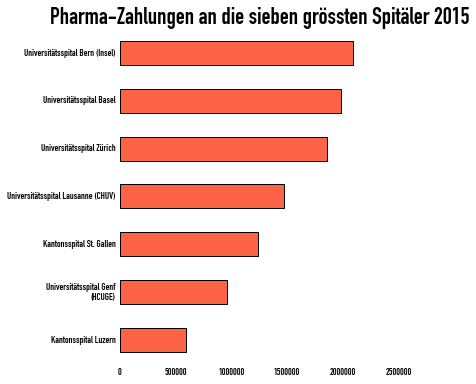

In [255]:
matplotlib.rcParams['font.sans-serif'] = "DIN Condensed"
matplotlib.rcParams['font.family'] = "DIN Condensed"

fig, ax = plt.subplots(figsize =(5,6), facecolor='White')

df_TOP7.groupby('INSTITUTIONS_CLUSTERED')['TOTAL'].sum().sort_values(ascending=True).plot\
                                                        (kind='barh', ax=ax, color='tomato')
    
ax.set_title("Pharma-Zahlungen an die sieben grössten Spitäler 2015", fontname='DIN Condensed', fontsize=24)
ax.set_ylabel(ylabel='')
plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='off',
    labelleft='on')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('Zahlung_an_Spitäler_TOTAL.pdf', transparent=True, bbox_inches='tight')

## 1 b) And how much do the various companies give them? Do some pharma-multis prefer some hospitals over others?

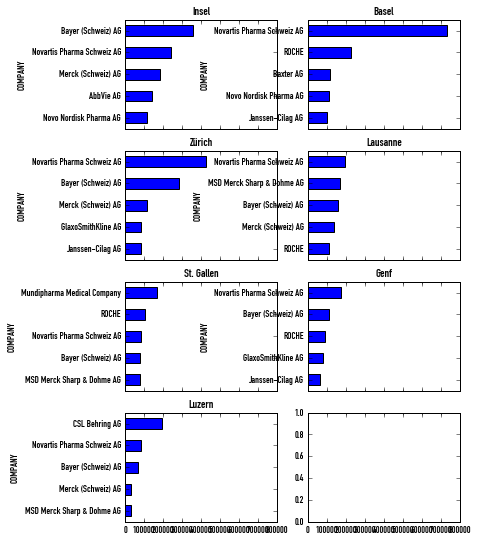

In [256]:
fig, ((ax1, ax2), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(facecolor='White', nrows=4, ncols=2, figsize=(6,9), sharex=True, sharey=False)

ax.set_title("Welche Pharma-Firmen zahlen den Spitälern am meisten", fontname='DIN Condensed', fontsize=24)

df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Universitätsspital Bern (Insel)'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax1, kind='barh')
ax1.set_title("Insel")
df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Universitätsspital Zürich'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax4, kind='barh')
ax4.set_title('Zürich')
df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Universitätsspital Basel'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax2, kind='barh')
ax2.set_title('Basel')
df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Universitätsspital Lausanne (CHUV)'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax5, kind='barh')
ax5.set_title('Lausanne')
df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Kantonsspital St. Gallen'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax6, kind='barh')
ax6.set_title('St. Gallen')
df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Universitätsspital Genf\n(HCUGE)'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax7, kind='barh')
ax7.set_title('Genf')
df_TOP7[df_TOP7['INSTITUTIONS_CLUSTERED'] == 'Kantonsspital Luzern'].groupby('COMPANY')['TOTAL'].sum().sort_values(ascending=True).tail(5).plot(ax=ax8, kind='barh')
ax8.set_title('Luzern')

plt.savefig('Zahlung_an_Spitäler_SMALL_MULTIPLES.pdf', transparent=True, bbox_inches='tight')

## 2 How is the money distributed to the hospitals distributed by canton?

In [257]:
#Function to deal with totals when importing the data importing:

def int_(x):
    if x == '5591-09-01 00:00:00':
        return float(x[0:4])
    elif x == '2000 00':
        return float(x[0:4])
    elif x == '700 00':
        return float(x[0:3])
    elif x == "1'000.0":
        return float(x[:1]*1000)
    elif x == "6'275.9":
        return float(x.replace("'", ""))
    elif x == "84'089.6":
        return float(x.replace("'", ""))
    elif x == "12'000.0":
        return float(x.replace("'", ""))
    elif x == "4'000.0":
        return float(x.replace("'", ""))
    else:
        return float(x)

In [258]:
df_ALL['TOTAL int'] = df_ALL['TOTAL'].apply(int_)

In [259]:
#Merging to pull out Kantons:
df_wCantons = df_ALL.merge(df_cantons, left_on = 'CITY', right_on ='GEMEINDEN') 

In [260]:
df_wCantons['TOTAL int'].sum()

54370282.049999997

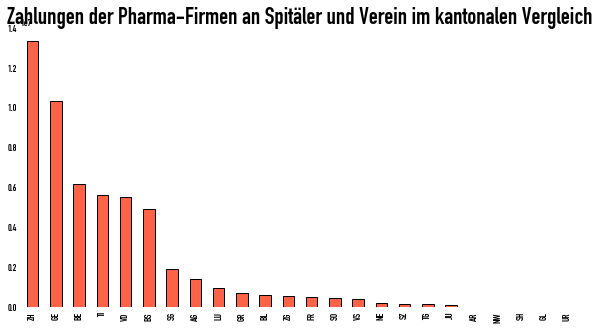

In [369]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
ax.set_title("Zahlungen der Pharma-Firmen an Spitäler und Verein im kantonalen Vergleich", fontname='DIN Condensed', fontsize=24)

df_wCantons.groupby('KANTON')['TOTAL int'].sum().sort_values(ascending=False).plot(kind='bar', color='tomato')

ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='off',
    labelleft='on')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('Total_Zahlungn_nach-Kanton.pdf', transparent=True, bbox_inches='tight')

# Developing the Scatter Plot to go with the Bar Graphs

In [262]:
df_CANTONNUMBERS = pd.read_csv('data/KANTONNUMBERS.csv')

In [263]:
df_wCantons = df_wCantons.merge(df_CANTONNUMBERS, left_on = 'KANTON', right_on ='KANTON')

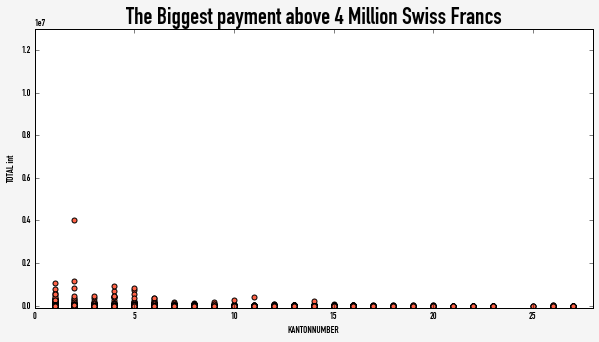

In [367]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='WhiteSmoke')
ax.set_title("The Biggest payment above 4 Million Swiss Francs", fontname='DIN Condensed', fontsize=24)

df_wCantons.plot(kind='scatter', x='KANTONNUMBER', y='TOTAL int', ax=ax, s=25, c='tomato')
ax.set_xlim([0, 28])
ax.set_ylim([-100000, 13000000])
plt.savefig('Scatter.pdf', transparent=True, bbox_inches='tight')

In [265]:
df_wCantons[df_wCantons['KANTON'] == 'TI'].sort_values(by='TOTAL int', ascending=False).head(3)

,PERIOD,COMPANY,INSTITUTION,INSTITUTIONS_CLUSTERED,CITY,COUNTRY,ADDRESS,ADDRESS CLUSTERED,DONATIONS AND GRANTS,SPONSORSHIPS,REGISTRATION FEES,TRAVEL AND ACCOMMODATION,FEES,OTHER EXPENSES AND CONSULTANCY,TOTAL,TOTAL int,INDEX,GEMEINDEN,KANTON,KANTONNUMBER
1286,2015,ROCHE,ESMO (European Society for Medical Oncology),ESMO (European Society for Medical Oncology),Viganello,CH,"Via Luigi Taddei 4, 6962, Viganello",Via Luigi Taddei 4,365731,544288,0,0,0,0,910019,910019.00,243,Viganello,TI,4.0
1164,2015,Novartis Pharma Schweiz AG,European School for Advanced Studies in Ophtha...,European School for Advanced Studies in Ophtha...,Lugano,CH,Viale Stefano Franscini 9,Viale Stefano Franscini 9,NaN,636709.2,35073.44,NaN,NaN,NaN,671782.64,671782.64,227,Lugano,TI,4.0
1284,2015,MSD Merck Sharp & Dohme AG,European Society for Medical Oncology,European Society for Medical Oncology,Viganello,CH,Via Luigi Taddei 4,Via Luigi Taddei 4,NaN,463704.32,NaN,NaN,NaN,NaN,463704.32,463704.32,243,Viganello,TI,4.0


In [266]:
df_wCantons[df_wCantons['KANTON'] == 'GE'].sort_values(by='TOTAL int', ascending=False).head(3)

,PERIOD,COMPANY,INSTITUTION,INSTITUTIONS_CLUSTERED,CITY,COUNTRY,ADDRESS,ADDRESS CLUSTERED,DONATIONS AND GRANTS,SPONSORSHIPS,REGISTRATION FEES,TRAVEL AND ACCOMMODATION,FEES,OTHER EXPENSES AND CONSULTANCY,TOTAL,TOTAL int,INDEX,GEMEINDEN,KANTON,KANTONNUMBER
2751,2015,Merck (Schweiz) AG,EXCEMED - Excellence in Medical Education,EXCEMED - Excellence in Medical Education,Genève,CH,"14, rue du Rhône","14, rue du Rhône",4043310.1,0,0,0,0,0,4043310.1,4043310.10,101,Genève,GE,2.0
2660,2015,AbbVie AG,EASL (European Association for the Study of th...,EASL (European Association for the Study of th...,Genève,CH,The EASL Building,The EASL Building,2359,1156210,NaN,NaN,NaN,NaN,1158569,1158569.00,101,Genève,GE,2.0
2850,2015,UCB-Pharma AG,WHO / QMS,WHO / QMS,Genève,CH,Avenue Appia 20,Avenue Appia 20,NaN,827515.79,0,0,0,0,827615.79,827615.79,101,Genève,GE,2.0


In [267]:
#Vereine und Spitäler in Zürich bekommen am meisten von er Pharma-Branche. 
#Obwohl das Tessin kein grosses Spital hat, bekommen Institutionen im Tessin 
#am viertmeisten Geld. Das hat vor allem mit der Organisation ESMO (European Society 
#for Medical Oncology) zu tun. Allein von Roche erhielt die Organisation 
#knapp 910019 CHF Gelder. Rund ein Drittel davon als einfache Spende.

In [268]:
#Wenn man sich die Durchschnittlichen Zahlungen anschaut, gibt es ein anderes Bild. Genf 
#hat die höchsten durschnittliclhen Zahlungen. Das hat vor allem mit der Zahlung der Firma
#Merck (Schweiz) AG zu tun, die "EXCEMED - Excellence in Medical Education" mit einer Spende
#von über 4 Millionen CHF unterstützt hat.

In [269]:
#Prepping file for export
del df_wCantons['INDEX']

In [270]:
del df_wCantons['DONATIONS AND GRANTS']
del df_wCantons['SPONSORSHIPS']
del df_wCantons['TRAVEL AND ACCOMMODATION']
del df_wCantons['FEES']
del df_wCantons['OTHER EXPENSES AND CONSULTANCY']
del df_wCantons['TOTAL']
del df_wCantons['GEMEINDEN']

In [271]:
df_wCantons.to_csv('ALLE_SPITÄLER_STIFTUNGEN_2015')   #df.to_csv('sample.csv', index=False)

In [272]:
df_TOP7.head(1)

,PERIOD,COMPANY,INSTITUTION,INSTITUTIONS_CLUSTERED,CITY,COUNTRY,ADDRESS,ADDRESS CLUSTERED,DONATIONS AND GRANTS,SPONSORSHIPS,REGISTRATION FEES,TRAVEL AND ACCOMMODATION,FEES,OTHER EXPENSES AND CONSULTANCY,TOTAL
0,2015,A. Menarini AG,CHUV Centre Hospitalier Uni Vaudois,Universitätsspital Lausanne (CHUV),Lausanne,CH,Rue du Bugnon21,Rue du Bugnon 21,NaN,6704,204,1689,811,NaN,9408.0


In [273]:
#Prepping file for export
del df_TOP7['DONATIONS AND GRANTS']
del df_TOP7['SPONSORSHIPS']
del df_TOP7['TRAVEL AND ACCOMMODATION']
del df_TOP7['FEES']
del df_TOP7['OTHER EXPENSES AND CONSULTANCY']

In [274]:
df_TOP7.to_csv('TOP_7_SPITÄLER_STIFTUNGEN')

# Looking at Hirslanden

In [275]:
df_wCantons[df_wCantons['INSTITUTIONS_CLUSTERED'] == 'Hirslanden']['TOTAL int'].sum()

60214.07

In [276]:
#Interessant, dass die private Klinik so viel weniger Geld von den Pharmas bekommt. Warum? 
#Schwierigkeit ist die Clustering der privaten Kliniken. So unterschiedliche Namen, und Adressen. 
#Hast Du einen Datensatz, der die Kategorien privat vs öffentlich kennt?

# Donations

In [277]:
# DONATIONS AND GRANTS - SPONSORSHIPS - REGISTRATION FEES - TRAVEL AND ACCOMMODATION
# - FEES - OTHER EXPENSES AND CONSULTANCY

In [286]:
df_wCantons['DONATIONS AND GRANTS int'] = df_ALL['DONATIONS AND GRANTS'].apply(int_)

In [333]:
#Function to deal with totals when importing the data importing:

def int_(x):
    if x == '5591-09-01 00:00:00':
        return float(x[0:4])
    elif x == '3130-08-01 00:00:00':
        return float(x[0:4])
    elif x == '2555-03-01 00:00:00':
        return float(x[0:4])
    elif x == '3007-02-01 00:00:00':
        return float(x[0:4])
    elif x == '6231-04-01 00:00:00':
        return float(x[0:4])
    elif x == '2880-04-01 00:00:00':
        return float(x[0:4])
    elif x == '2252-06-01 00:00:00':
        return float(x[0:4])
    elif x == '2000 00':
        return float(x[0:4])
    elif x == '700 00':
        return float(x[0:3])
    elif x == "1'000.0":
        return float(x[:1]*1000)
    elif x == "6'275.9":
        return float(x.replace("'", ""))
    elif x == "84'089.6":
        return float(x.replace("'", ""))
    elif x == "12'000.0":
        return float(x.replace("'", ""))
    elif x == "4'000.0":
        return float(x.replace("'", ""))
    elif x == "6'000.0":
        return float(x.replace("'", ""))
    elif x == "25'000.0":
        return float(x.replace("'", ""))
    elif x == "3'000.0":
        return float(x.replace("'", ""))
    elif x == "4'800.0":
        return float(x.replace("'", ""))
    else:
        return float(x)

In [335]:
#but this is how you transform them
df_wCantons['DONATIONS AND GRANTS int'] = df_wCantons.replace([np.inf, -np.inf], np.nan)

In [336]:
df_wCantons['DONATIONS AND GRANTS int'].sum()

6840925

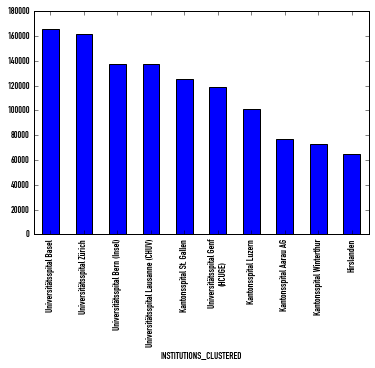

In [364]:
df_wCantons.groupby('INSTITUTIONS_CLUSTERED')['DONATIONS AND GRANTS int'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('Donations.pdf', transparent=True, bbox_inches='tight')

In [338]:
df_wCantons['TRAVEL AND ACCOMMODATION'] = df_ALL['TRAVEL AND ACCOMMODATION'].apply(int_)

In [345]:
def UZH(x):
    if x == 'Universitätsspital Zürich, Klinik für Neurologie':
        return 'Universitätsspital Zürich'
    else:
        return x

In [346]:
df_wCantons['INSTITUTIONS_CLUSTERED'] = df_wCantons['INSTITUTIONS_CLUSTERED'].apply(UZH)

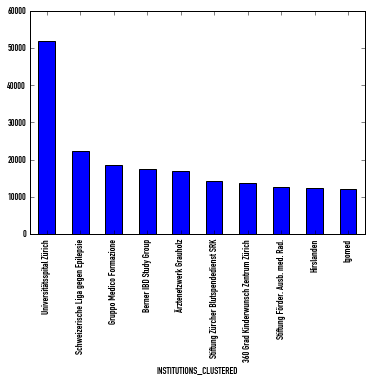

In [365]:
df_wCantons.groupby('INSTITUTIONS_CLUSTERED')['TRAVEL AND ACCOMMODATION'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('Travel.pdf', transparent=True, bbox_inches='tight')

In [362]:
df_wCantons['TRAVEL AND ACCOMMODATION'].sum()

555101.15000000002

# Developing universal function

In [244]:
def find(x):
    pattern = re.compile(r"'")
    try:
        if pattern.findall(x):
            x = x.replace("'", "")
            return x
    except:
        return x

In [224]:
list_ = [2, 43, 43, "4'000", 23]

In [228]:
for y in list_:
    pattern = re.compile(r"'")
    try:
        if pattern.findall(y):
            y = y.replace("'", "")
            print(y)
    except:
        print(y)

2
43
43
4000
23


In [240]:
def find(x):
    for y in x:
        pattern = re.compile(r"'")
        if pattern.findall(y):
            return y.replace("'", "")
        else:
            return y